In [1]:
import networkx as nx
import pandas as pd

raw = pd.read_csv('Kobe_5101.csv')

In [2]:
# takes the two columns needed

raw['type'] = raw['to'].isna().map(lambda s : 'Tweet' if s else 'RT')

edges = raw[['username','to', 'type']].ffill(axis=1)

# getting unique users in df for phantombuster

In [15]:
len(edges["username"].unique())

4458

In [16]:
all_users = edges["username"].append(edges["to"])

In [19]:
all_users.unique()

array(['msantos824', 'jenvrgs', 'hungrrypanda', ..., '50sixnights',
       'Estadao', 'DragonflyJonez'], dtype=object)

In [22]:
unique_users = pd.Series(all_users.unique())
users_df = pd.DataFrame(unique_users)

In [25]:
users_df.to_csv("users.csv")

# create new df with user statistics added

In [26]:
user_stats = pd.read_csv('users_profile_data.csv')

In [28]:
user_stats.head()

,tweetsCount,followers,following,likes,lists,name,twitterProfile,bio,handle,location,website,joinDate,protectedAccount,followback,query,timestamp,error
0,4238.0,47.0,615.0,4238.0,1.0,Michael Santos,https://twitter.com/msantos824,using twitter for information,@msantos824,NaN,NaN,2013-09-24T12:51:04.000Z,NaN,NaN,msantos824,2020-02-07T22:48:42.901Z,NaN
1,74400.0,2909.0,1027.0,74400.0,8.0,9,https://twitter.com/jenvrgs,kind of a big deallll,@jenvrgs,"Maryland, USA",https://instagram.com/jennvrgs,2012-07-07T04:16:02.000Z,NaN,NaN,jenvrgs,2020-02-07T22:48:44.230Z,NaN
2,7683.0,121.0,767.0,7683.0,7.0,hungrrypanda,https://twitter.com/hungrrypanda,California girl doing a little East Coast Livi...,@hungrrypanda,Boston,NaN,2011-04-09T15:15:21.000Z,NaN,NaN,hungrrypanda,2020-02-07T22:48:45.590Z,NaN
3,3923.0,54.0,208.0,3923.0,NaN,Alessandra,https://twitter.com/alessaJBiebs1,Shaking hands with the dark parts øf my thøughts.,@alessaJBiebs1,NaN,NaN,2018-07-19T21:27:37.000Z,NaN,NaN,alessaJBiebs1,2020-02-07T22:48:46.765Z,NaN
4,345.0,86.0,206.0,345.0,2.0,Julkee,https://twitter.com/Julkee,Escuche la ciudad respirando. Listen the city ...,@Julkee,Puebla,NaN,2009-04-25T06:13:53.000Z,NaN,NaN,Julkee,2020-02-07T22:48:47.907Z,NaN


In [29]:
user_followers = user_stats[["query", "followers"]]
user_followers.head()

,query,followers
0,msantos824,47.0
1,jenvrgs,2909.0
2,hungrrypanda,121.0
3,alessaJBiebs1,54.0
4,Julkee,86.0


In [30]:
edges.head()

,username,to,type
0,msantos824,therealjoemoses,RT
1,jenvrgs,jenvrgs,Tweet
2,hungrrypanda,barstoolsports,RT
3,alessaJBiebs1,alessaJBiebs1,Tweet
4,Julkee,Julkee,Tweet


In [32]:
edges_followers = pd.merge(edges, user_followers, left_on = "username", right_on = "query")
edges_followers.head()

,username,to,type,query,followers
0,msantos824,therealjoemoses,RT,msantos824,47.0
1,jenvrgs,jenvrgs,Tweet,jenvrgs,2909.0
2,hungrrypanda,barstoolsports,RT,hungrrypanda,121.0
3,alessaJBiebs1,alessaJBiebs1,Tweet,alessaJBiebs1,54.0
4,alessaJBiebs1,alessaJBiebs1,Tweet,alessaJBiebs1,54.0


In [37]:
print(edges_followers.isnull().sum()/len(edges_followers)*100)

username      0.000000
to            0.000000
type          0.000000
query         0.000000
followers    18.095238
dtype: float64


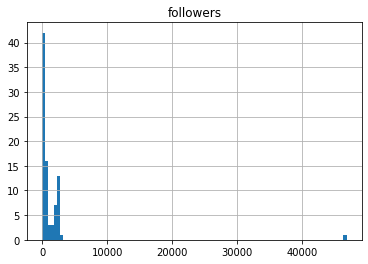

In [45]:
import matplotlib.pyplot as plt
edges_followers.hist(bins = 100)
plt.show()

In [44]:
edges_followers["followers"].median()

480.0

In [50]:
edges_followers.fillna(edges_followers.median(), inplace=True)
print(edges_followers.isnull().sum()/len(edges_followers)*100)

username     0.0
to           0.0
type         0.0
query        0.0
followers    0.0
dtype: float64


In [51]:
edges_followers.to_csv("followers_df.csv")

# networkX 

In [3]:
G = nx.convert_matrix.from_pandas_edgelist(edges, 'username','to')

In [4]:
betweenness = nx.betweenness_centrality(G)
degree = nx.degree_centrality(G)
closeness = nx.closeness_centrality(G)

In [5]:
# {k: v for k, v in sorted(closeness.items(), key=lambda item: item[1], reverse=True)}

In [6]:
import matplotlib.pyplot as plt

G_subset = nx.convert_matrix.from_pandas_edgelist(edges, 'username','to')
plt.figure(figsize=(180,90))
nx.draw(G, with_labels=True, width=2.0, alpha = .5)

plt.show()

C:\Users\chris\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<Figure size 18000x9000 with 1 Axes>